In [4]:
%matplotlib inline
import matplotlib 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
from dateutil import parser
import datetime
import pytz
localtz = pytz.timezone('US/Eastern')

sns.set(style='white', palette='Set2')

def dateparse (timestamp):    
    return parser.parse(timestamp)


df = pd.read_pickle('ml_conditions_plus.pkl')

df.index = df.index.tz_convert('US/Eastern')


print df.columns.values

['alphaS3_aux' 'pressureWind' 'alphaS1_aux' 'alphaS2_aux' 'sharpDust'
 'alphaS3_work' 'alphaS2_work' 'alphaS1_work' 'alphaTemp'
 'min_since_plugged_in' 'Battery ( %)' 'Humidity ( % RAW)' 'Noise ( mV)'
 'Temperature ( C RAW)' 'Light ( lx)' 'Nitrogen Dioxide ( kOhm)'
 'Carbon Monxide ( kOhm)' 'Solar Panel ( V)' 'wd' 'ws'
 u'forecastio_apparentTemperature' u'forecastio_cloudCover'
 u'forecastio_dewPoint' u'forecastio_humidity' u'forecastio_ozone'
 u'forecastio_precipIntensity' u'forecastio_precipProbability'
 u'forecastio_pressure' u'forecastio_temperature' u'forecastio_visibility'
 u'forecastio_windBearing' u'forecastio_windSpeed' 'forecastio_clear-night'
 'forecastio_clear-day' 'forecastio_partly-cloudy-day'
 'forecastio_partly-cloudy-night' 'forecastio_cloudy' 'forecastio_rain'
 'forecastio_fog' 'forecastio_wind' 'as_temperature' 'as_o3' 'as_co'
 'as_h2s' 'sck_temperature' 'sck_humidity' 'forecastio_temperature_c'
 'avg_15_as_temperature' 'avg_60_forecastio_temperature_c'
 'derivative_

In [6]:
#running average for humidity forecast.io

num_avg = 60

ref_col = 'forecastio_humidity'
avg_col= 'avg_' + str(num_avg) + '_forecastio_humidity'
df[avg_col] = df[ref_col].rolling(window=num_avg, center=False).mean()
df[avg_col] = df[avg_col].shift(-num_avg)

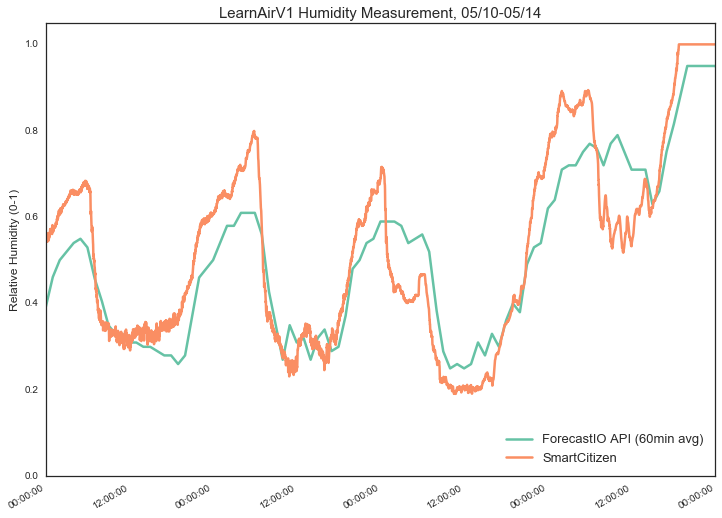

In [21]:
starttime = datetime.datetime(2016,5,10)
endtime = datetime.datetime(2016,5,14)

value2 = 'sck_humidity_saturated'
#value1 = 'forecastio_humidity'
value1 = 'avg_' + str(num_avg) + '_forecastio_humidity'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5)
    
plt.legend(['ForecastIO API (60min avg)','SmartCitizen'], fontsize=13, loc=4 )
plt.ylabel('Relative Humidity (0-1)', fontsize=12)
plt.title('LearnAirV1 Humidity Measurement, 05/10-05/14', fontsize=15)
plt.ylim(0,1.05)

plt.savefig('./figs/humidity_zoomed.png', bbox_inches='tight', dpi=200)

In [18]:
#cut RH of citizen sensor off at 100%
df['sck_humidity_saturated'] = [val if val <= 1 else 1 for val in df['sck_humidity']]

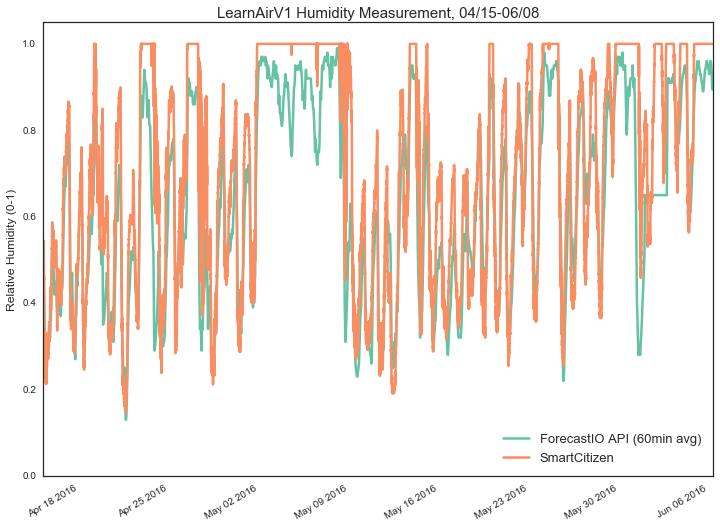

In [22]:
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.index.values, df[value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.index.values, df[value2].values, lw=2.5)
    
plt.legend(['ForecastIO API (60min avg)','SmartCitizen'], fontsize=13, loc=4 )
plt.ylabel('Relative Humidity (0-1)', fontsize=12)
plt.title('LearnAirV1 Humidity Measurement, 04/15-06/08', fontsize=15)
plt.ylim(0,1.05)

plt.savefig('./figs/humidity.png', bbox_inches='tight', dpi=200)

In [23]:
#create daily moving average with some number of points for humidity
num_avg = 60*24

ref_col = 'sck_humidity_saturated'
avg_col= 'daily_avg_sck_humidity'
df[avg_col] = df[ref_col].rolling(window=num_avg, center=True).mean()

ref_col = 'forecastio_humidity'
avg_col= 'daily_avg_forecastio_humidity'
df[avg_col] = df[ref_col].rolling(window=num_avg, center=True).mean()

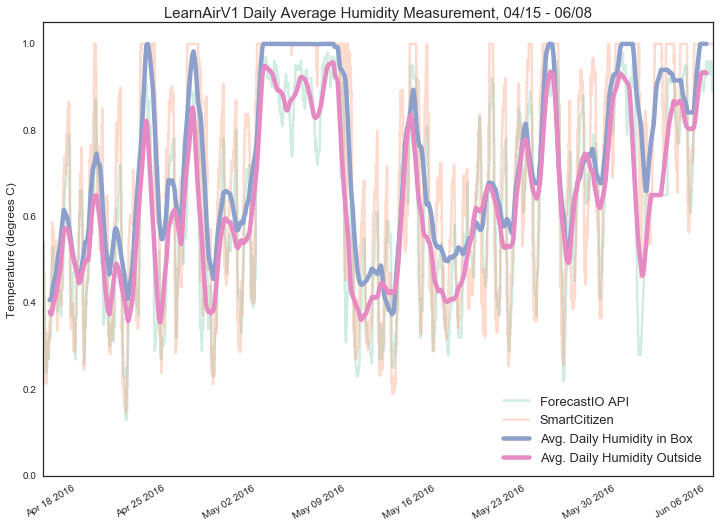

In [26]:
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

value4 = 'daily_avg_forecastio_humidity'
value3 = 'daily_avg_sck_humidity'
value2 = 'sck_humidity_saturated'
value1 = 'forecastio_humidity'

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')
    
plt.plot(df.index.values, df[value1].values, lw=2.5, alpha=0.3)
if value2 is not None:
    plt.plot(df.index.values, df[value2].values, lw=2.5, alpha=0.3)
if value4 is not None:
    plt.plot(df.index.values, df[value3].values, lw=4.5)
if value3 is not None:
    plt.plot(df.index.values, df[value4].values, lw=4.5)
    
plt.legend(['ForecastIO API','SmartCitizen', 'Avg. Daily Humidity in Box', 'Avg. Daily Humidity Outside'], fontsize=13, loc=4 )
plt.ylabel('Temperature (degrees C)', fontsize=12)
plt.title('LearnAirV1 Daily Average Humidity Measurement, 04/15 - 06/08', fontsize=15)
plt.ylim(0,1.05)

plt.savefig('./figs/humidity_daily.png', bbox_inches='tight', dpi=200)

In [27]:
df.to_pickle('ml_conditions_plus.pkl')

In [28]:
print df.columns.values

['alphaS3_aux' 'pressureWind' 'alphaS1_aux' 'alphaS2_aux' 'sharpDust'
 'alphaS3_work' 'alphaS2_work' 'alphaS1_work' 'alphaTemp'
 'min_since_plugged_in' 'Battery ( %)' 'Humidity ( % RAW)' 'Noise ( mV)'
 'Temperature ( C RAW)' 'Light ( lx)' 'Nitrogen Dioxide ( kOhm)'
 'Carbon Monxide ( kOhm)' 'Solar Panel ( V)' 'wd' 'ws'
 u'forecastio_apparentTemperature' u'forecastio_cloudCover'
 u'forecastio_dewPoint' u'forecastio_humidity' u'forecastio_ozone'
 u'forecastio_precipIntensity' u'forecastio_precipProbability'
 u'forecastio_pressure' u'forecastio_temperature' u'forecastio_visibility'
 u'forecastio_windBearing' u'forecastio_windSpeed' 'forecastio_clear-night'
 'forecastio_clear-day' 'forecastio_partly-cloudy-day'
 'forecastio_partly-cloudy-night' 'forecastio_cloudy' 'forecastio_rain'
 'forecastio_fog' 'forecastio_wind' 'as_temperature' 'as_o3' 'as_co'
 'as_h2s' 'sck_temperature' 'sck_humidity' 'forecastio_temperature_c'
 'avg_15_as_temperature' 'avg_60_forecastio_temperature_c'
 'derivative_

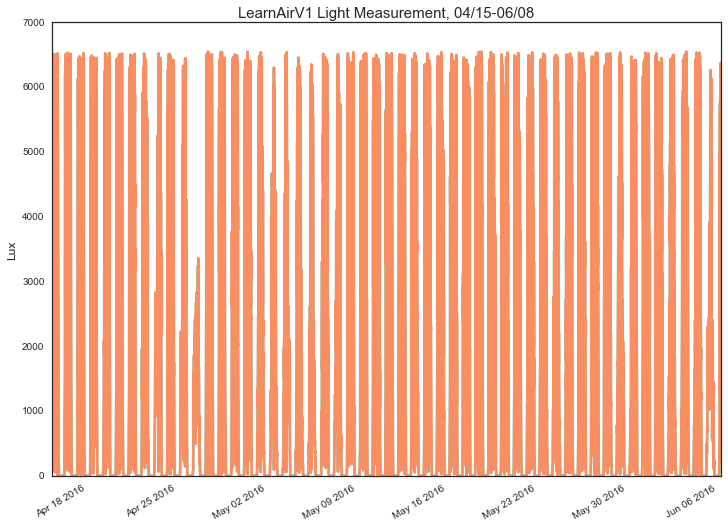

In [37]:
#lux
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

value1 = 'Light ( lx)'

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.index.values, df[value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.index.values, df[value2].values, lw=2.5)
    
#plt.legend(['ForecastIO API (60min avg)','SmartCitizen'], fontsize=13, loc=4 )
plt.ylabel('Lux', fontsize=12)
plt.title('LearnAirV1 Light Measurement, 04/15-06/08', fontsize=15)


plt.savefig('./figs/lux.png', bbox_inches='tight', dpi=200)

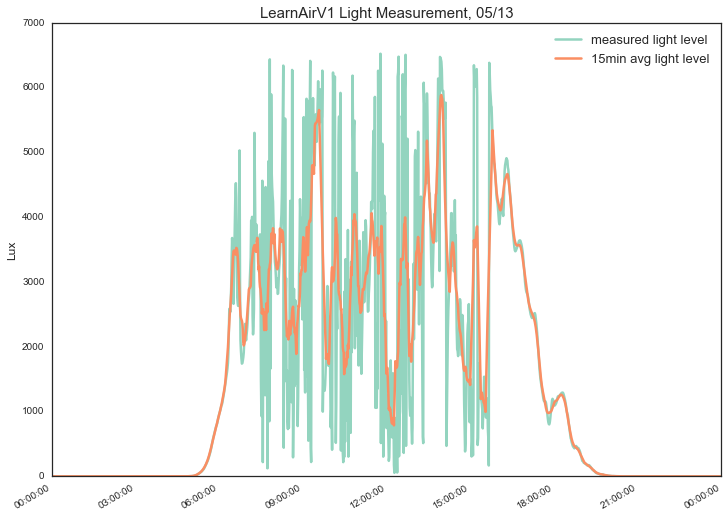

In [43]:
#lx zoomed
num_avg = 15

ref_col = 'Light ( lx)'
avg_col= 'avg_15_lx'
df[avg_col] = df[ref_col].rolling(window=num_avg, center=True).mean()



starttime = datetime.datetime(2016,5,13)
endtime = datetime.datetime(2016,5,14)


value1 = 'Light ( lx)'
value2 = 'avg_15_lx'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=2.5, alpha=.7)
if value2 is not None:
    plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5)
    
plt.legend(['measured light level','15min avg light level'], fontsize=13, loc=1 )
plt.ylabel('Lux', fontsize=12)
plt.title('LearnAirV1 Light Measurement, 05/13', fontsize=15)
#plt.ylim(0,1.05)

plt.savefig('./figs/lux_zoomed.png', bbox_inches='tight', dpi=200)

clear hours = 795
partly cloudy hours = 216
cloudy hours = 112
raining hours = 96
windy hours = 19
foggy hours = 11


"\nfig, ax = plt.subplots()\nplt.plot(result.ix[starttime:endtime].index.values, result.ix[starttime:endtime]['avg_lmse_ws'])\nplt.plot(result.ix[starttime:endtime]['avg_ws'])\n\naccurate_axis = result.ix[starttime: endtime][accurate_col]*result[ref_col].max()*2\n#plt.plot(accurate_axis, color='green', alpha=0.07)\nax.fill_between(result.ix[starttime:endtime].index.values, 0, accurate_axis, color='green', alpha=0.1)\n\nplt.title('arduino moving avg lmse ws vs actual ws')\nplt.ylim(0,15)\n"

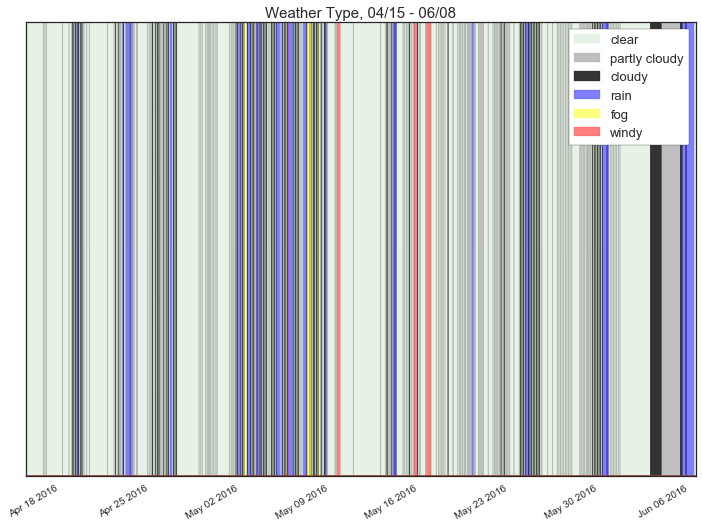

In [59]:
#icons
# 'forecastio_clear-night' 'forecastio_clear-day' 'forecastio_partly-cloudy-day'
# 'forecastio_partly-cloudy-night' 'forecastio_cloudy' 'forecastio_rain'
# 'forecastio_fog' 'forecastio_wind

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)

#clear
a_axis = df['forecastio_clear-night']*2 + df['forecastio_clear-day']*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, a_axis, color='green', alpha=0.1)

#partly-cloudy
a_axis = df['forecastio_partly-cloudy-night']*2 + df['forecastio_partly-cloudy-day']*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, a_axis, color='grey', alpha=0.5)

#cloudy
a_axis = df['forecastio_cloudy']*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, a_axis, color='black', alpha=0.8)

#rain
a_axis = df['forecastio_rain']*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, a_axis, color='blue', alpha=0.5)

#fog
a_axis = df['forecastio_fog']*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, a_axis, color='yellow', alpha=0.5)

#wind
a_axis = df['forecastio_wind']*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, a_axis, color='red', alpha=0.5)

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.title('Weather Type, 04/15 - 06/08', fontsize=15)
plt.ylim(0,1)
ax.get_yaxis().set_visible(False)

plt.legend(['clear','partly cloudy', 'cloudy', 'rain','fog','windy'], fontsize=13, loc=1, frameon=True)


print 'clear hours = %s' % ((df['forecastio_clear-day'].sum() + df['forecastio_clear-night'].sum())/60)
print 'partly cloudy hours = %s' % ((df['forecastio_partly-cloudy-day'].sum() + df['forecastio_partly-cloudy-night'].sum())/60)
print 'cloudy hours = %s' % (df['forecastio_cloudy'].sum()/60)
print 'raining hours = %s' % (df['forecastio_rain'].sum()/60)
print 'windy hours = %s' % (df['forecastio_wind'].sum()/60)
print 'foggy hours = %s' % (df['forecastio_fog'].sum()/60)

plt.savefig('./figs/weather.png', bbox_inches='tight', dpi=200)

'''
fig, ax = plt.subplots()
plt.plot(result.ix[starttime:endtime].index.values, result.ix[starttime:endtime]['avg_lmse_ws'])
plt.plot(result.ix[starttime:endtime]['avg_ws'])

accurate_axis = result.ix[starttime: endtime][accurate_col]*result[ref_col].max()*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(result.ix[starttime:endtime].index.values, 0, accurate_axis, color='green', alpha=0.1)

plt.title('arduino moving avg lmse ws vs actual ws')
plt.ylim(0,15)
'''

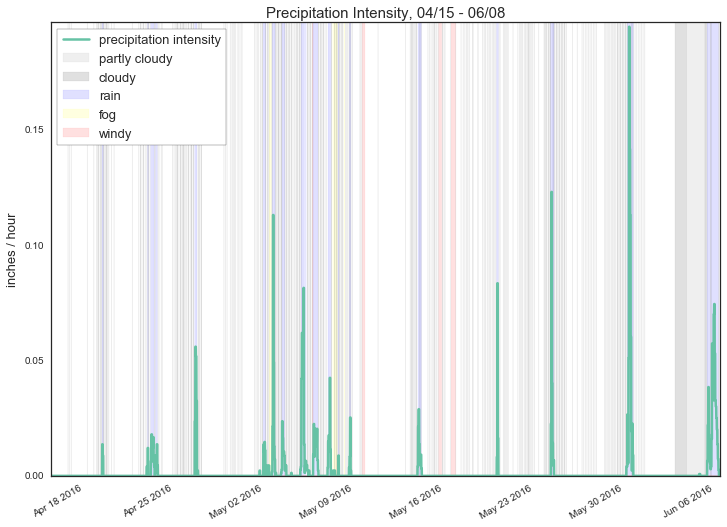

In [88]:
#icons with precip intensity

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)

overlay_value='forecastio_precipIntensity'

#partly-cloudy
a_axis = df['forecastio_partly-cloudy-night']*2*df[overlay_value].max() + df['forecastio_partly-cloudy-day']*2*df[overlay_value].max()
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, a_axis, color='grey', alpha=0.12)

#cloudy
a_axis = df['forecastio_cloudy']*2*df[overlay_value].max()
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, a_axis, color='black', alpha=0.12)

#rain
a_axis = df['forecastio_rain']*2*df[overlay_value].max()
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, a_axis, color='blue', alpha=0.12)

#fog
a_axis = df['forecastio_fog']*2*df[overlay_value].max()
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, a_axis, color='yellow', alpha=0.12)

#wind
a_axis = df['forecastio_wind']*2*df[overlay_value].max()
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, a_axis, color='red', alpha=0.12)


#precip_intensity
plt.plot(df.index.values, df[overlay_value].values, lw=2.5)
    

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.title('Precipitation Intensity, 04/15 - 06/08', fontsize=15)
plt.ylim(0,1.01*df[overlay_value].max())
ax.set_ylabel('inches / hour', fontsize=13)

plt.legend(['precipitation intensity', 'partly cloudy', 'cloudy', 'rain','fog','windy'], fontsize=13, loc=2, frameon=True)

plt.savefig('./figs/precip_intensity.png', bbox_inches='tight', dpi=200)


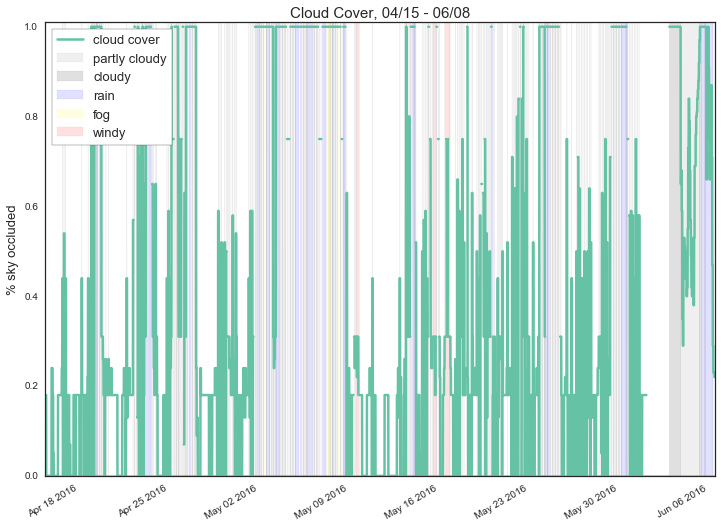

In [102]:
#icons with cloud cover

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)

overlay_value='forecastio_cloudCover'

#partly-cloudy
a_axis = df['forecastio_partly-cloudy-night']*2*df[overlay_value].max() + df['forecastio_partly-cloudy-day']*2*df[overlay_value].max()
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, a_axis, color='grey', alpha=0.12)

#cloudy
a_axis = df['forecastio_cloudy']*2*df[overlay_value].max()
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, a_axis, color='black', alpha=0.12)

#rain
a_axis = df['forecastio_rain']*2*df[overlay_value].max()
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, a_axis, color='blue', alpha=0.12)

#fog
a_axis = df['forecastio_fog']*2*df[overlay_value].max()
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, a_axis, color='yellow', alpha=0.12)

#wind
a_axis = df['forecastio_wind']*2*df[overlay_value].max()
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, a_axis, color='red', alpha=0.12)


#precip_intensity
plt.plot(df.index.values, df[overlay_value].values, lw=2.5)
    

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.title('Cloud Cover, 04/15 - 06/08', fontsize=15)
plt.ylim(0,1.01*df[overlay_value].max())
ax.set_ylabel('% sky occluded', fontsize=13)

plt.legend(['cloud cover', 'partly cloudy', 'cloudy', 'rain','fog','windy'], fontsize=13, loc=2, frameon=True)

plt.savefig('./figs/cloud_cover.png', bbox_inches='tight', dpi=200)


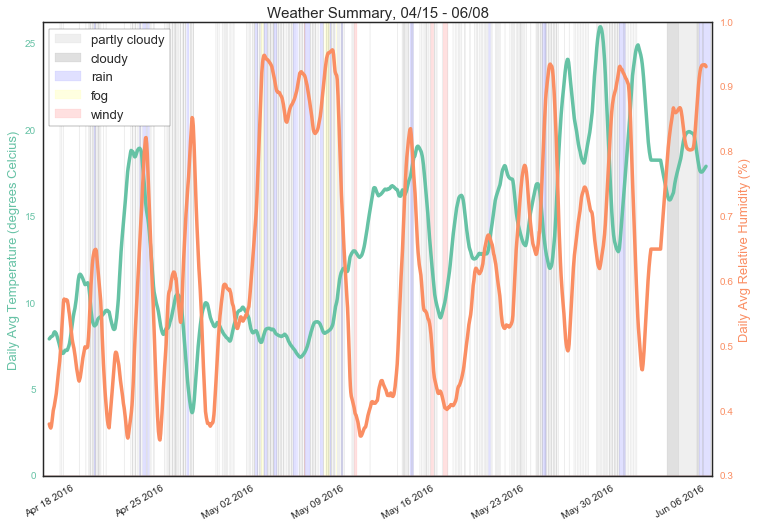

In [85]:
#summary of weather


fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)

overlay_value='daily_avg_forecastio_temperature'

#partly-cloudy
a_axis = df['forecastio_partly-cloudy-night']*2*df[overlay_value].max() + df['forecastio_partly-cloudy-day']*2*df[overlay_value].max()
#plt.plot(accurate_axis, color='green', alpha=0.07)
la= ax.fill_between(df.index.values, 0, a_axis, color='grey', alpha=0.12)

#cloudy
a_axis = df['forecastio_cloudy']*2*df[overlay_value].max()
#plt.plot(accurate_axis, color='green', alpha=0.07)
lb= ax.fill_between(df.index.values, 0, a_axis, color='black', alpha=0.12)

#rain
a_axis = df['forecastio_rain']*2*df[overlay_value].max()
#plt.plot(accurate_axis, color='green', alpha=0.07)
lc= ax.fill_between(df.index.values, 0, a_axis, color='blue', alpha=0.12)

#fog
a_axis = df['forecastio_fog']*2*df[overlay_value].max()
#plt.plot(accurate_axis, color='green', alpha=0.07)
ld= ax.fill_between(df.index.values, 0, a_axis, color='yellow', alpha=0.12)

#wind
a_axis = df['forecastio_wind']*2*df[overlay_value].max()
#plt.plot(accurate_axis, color='green', alpha=0.07)
le= ax.fill_between(df.index.values, 0, a_axis, color='red', alpha=0.12)


#main value
l1= plt.plot(df.index.values, df[overlay_value].values, lw=3.5)
    

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.title('Weather Summary, 04/15 - 06/08', fontsize=15)
plt.ylim(0,1.01*df[overlay_value].max())

ax.set_ylabel('Daily Avg Temperature (degrees Celcius)', color=sns.color_palette()[0], fontsize=13)
for tl in ax.get_yticklabels():
    tl.set_color(sns.color_palette()[0])
    
ax2 = ax.twinx()
l2= ax2.plot(df.index.values, df['daily_avg_forecastio_humidity'].values, color=sns.color_palette()[1], lw=3.5 )
ax2.set_ylabel('Daily Avg Relative Humidity (%)', color=sns.color_palette()[1], fontsize=13)
for tl in ax2.get_yticklabels():
    tl.set_color(sns.color_palette()[1])

plt.legend([la, lb, lc, ld, le], ['partly cloudy', 'cloudy', 'rain','fog','windy'], fontsize=13, loc=2, frameon=True)

plt.savefig('./figs/weather_summary.png', bbox_inches='tight', dpi=200)

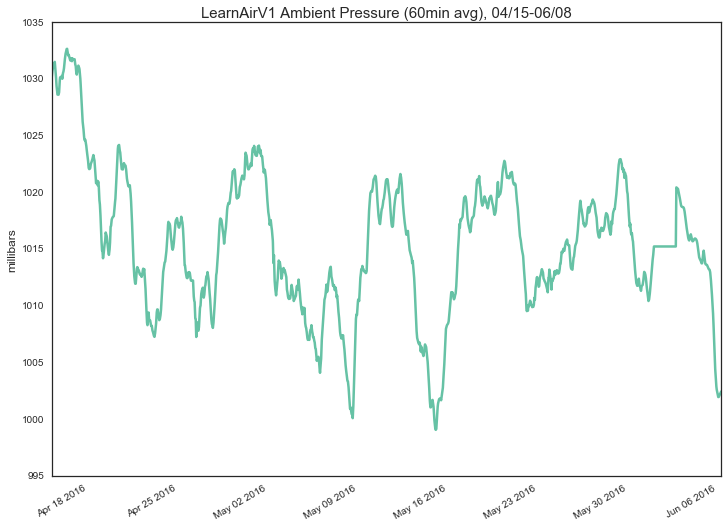

In [91]:
#pressure


#running average for pressure forecast.io

num_avg = 60

ref_col = 'forecastio_pressure'
avg_col= 'avg_' + str(num_avg) + '_' + ref_col
df[avg_col] = df[ref_col].rolling(window=num_avg, center=False).mean()
df[avg_col] = df[avg_col].shift(-num_avg)


#plot
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

value1 = avg_col

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.index.values, df[value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
    
plt.ylabel('millibars', fontsize=12)
plt.title('LearnAirV1 Ambient Pressure (60min avg), 04/15-06/08', fontsize=15)


plt.savefig('./figs/ambient_pressure.png', bbox_inches='tight', dpi=200)


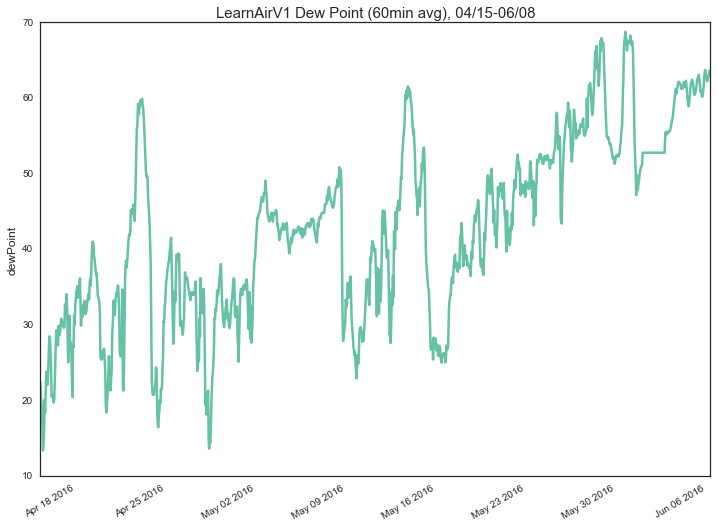

In [93]:
#dew


#running average for dew forecast.io

num_avg = 60

ref_col = 'forecastio_dewPoint'
avg_col= 'avg_' + str(num_avg) + '_' + ref_col
df[avg_col] = df[ref_col].rolling(window=num_avg, center=False).mean()
df[avg_col] = df[avg_col].shift(-num_avg)


#plot
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

value1 = avg_col

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.index.values, df[value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
    
plt.ylabel('dewPoint', fontsize=12)
plt.title('LearnAirV1 Dew Point (60min avg), 04/15-06/08', fontsize=15)


plt.savefig('./figs/dew.png', bbox_inches='tight', dpi=200)

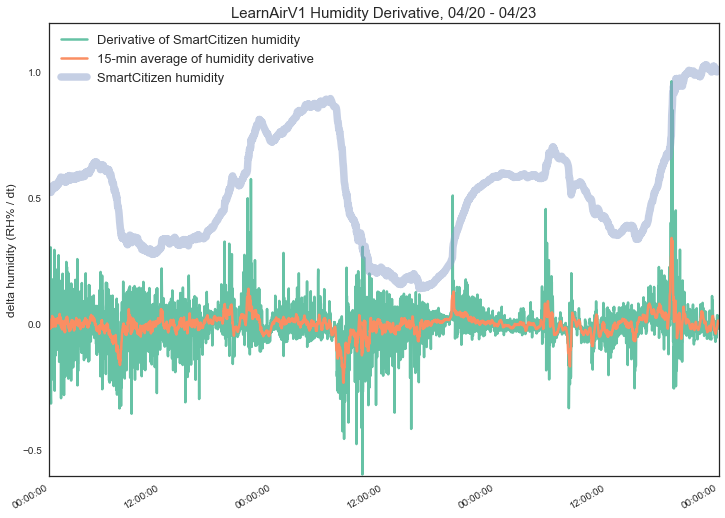

In [83]:
#derivative of humidity

#create derivative for humidity
ref_col = 'sck_humidity'
avg_col= 'derivative_sck_humidity'
df[avg_col] = df[ref_col].diff()

#create moving average for derivative of temp
ref_col = 'derivative_sck_humidity'
avg_col= 'avg_15_derivative_sck_humidity'
df[avg_col] = df[ref_col].rolling(window=15, center=True).mean()

#plot
starttime = datetime.datetime(2016,4,20)
endtime = datetime.datetime(2016,4,23)

value1 = 'sck_humidity'
value2 = 'derivative_sck_humidity'
value3 = 'avg_15_derivative_sck_humidity'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values*25, tz=localtz, ls='solid', marker=None, lw=2.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values*25, lw=2.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, lw=7.5, alpha=0.5)

plt.legend(['Derivative of SmartCitizen humidity', '15-min average of humidity derivative', 'SmartCitizen humidity'], fontsize=13, loc=2)
plt.ylabel('delta humidity (RH% / dt)', fontsize=12)
plt.title('LearnAirV1 Humidity Derivative, 04/20 - 04/23', fontsize=15)

plt.savefig('./figs/humidity_derivative.png', bbox_inches='tight', dpi=200)

In [98]:
#create running averages for the following:

# u'forecastio_apparentTemperature' u'forecastio_cloudCover'
# u'forecastio_ozone' u'forecastio_visibility'
# u'forecastio_precipIntensity' u'forecastio_precipProbability'
# u'forecastio_windBearing' u'forecastio_windSpeed'

cols_to_avg = ['forecastio_apparentTemperature','forecastio_cloudCover', 'forecastio_precipProbability', 
               'forecastio_ozone', 'forecastio_visibility', 'forecastio_precipIntensity',  
               'forecastio_windBearing', 'forecastio_windSpeed']

num_avg = 60

for col in cols_to_avg:
    avg_col= 'avg_' + str(num_avg) + '_' + col
    df[avg_col] = df[col].rolling(window=num_avg, center=False).mean()
    df[avg_col] = df[avg_col].shift(-num_avg)

print df.columns.values

['alphaS3_aux' 'pressureWind' 'alphaS1_aux' 'alphaS2_aux' 'sharpDust'
 'alphaS3_work' 'alphaS2_work' 'alphaS1_work' 'alphaTemp'
 'min_since_plugged_in' 'Battery ( %)' 'Humidity ( % RAW)' 'Noise ( mV)'
 'Temperature ( C RAW)' 'Light ( lx)' 'Nitrogen Dioxide ( kOhm)'
 'Carbon Monxide ( kOhm)' 'Solar Panel ( V)' 'wd' 'ws'
 u'forecastio_apparentTemperature' u'forecastio_cloudCover'
 u'forecastio_dewPoint' u'forecastio_humidity' u'forecastio_ozone'
 u'forecastio_precipIntensity' u'forecastio_precipProbability'
 u'forecastio_pressure' u'forecastio_temperature' u'forecastio_visibility'
 u'forecastio_windBearing' u'forecastio_windSpeed' 'forecastio_clear-night'
 'forecastio_clear-day' 'forecastio_partly-cloudy-day'
 'forecastio_partly-cloudy-night' 'forecastio_cloudy' 'forecastio_rain'
 'forecastio_fog' 'forecastio_wind' 'as_temperature' 'as_o3' 'as_co'
 'as_h2s' 'sck_temperature' 'sck_humidity' 'forecastio_temperature_c'
 'avg_15_as_temperature' 'avg_60_forecastio_temperature_c'
 'derivative_

In [103]:
df.to_pickle('ml_conditions_plus.pkl')